## Imports 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
pip install pydicom

     |████████████████████████████████| 35.3MB 126kB/s 


In [0]:
import os
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from pathlib import Path
import cv2
from PIL import Image
import numpy as np
# import pydicom
# from pydicom.data import get_testdata_files
import random

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#path_img = Path('images')
#fnames = os.listdir(str(path_img))
#path_lbl = Path('masks')
#lblnames = os.listdir(str(path_lbl))
#fnames.sort()
#lblnames.sort()

## Importing inputs

In [0]:
path_lbl = Path('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)')
path_img = Path('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)')
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

In [66]:
fnames[:5]

[PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)/01-2461G_(2.02,0,20190,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)/01-2461G_(2.02,0,0,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)/01-2461G_(2.02,0,22209,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)/01-2461G_(2.02,0,16152,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles (1)/01-2461G_(2.02,0,10095,2019,2019).png')]

In [67]:
lbl_names[:5]

[PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)/01-2461G_(2.02,0,8076,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)/01-2461G_(2.02,0,30285,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)/01-2461G_(2.02,0,6057,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)/01-2461G_(2.02,10095,0,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks (1)/01-2461G_(2.02,10095,10095,2019,2019)-labels.png')]

In [37]:
# fnames[0]
# # path_img
# # os.path.join(str(path_img),fnames[0])
# fi = os.path.split(fnames[0])[1]
# os.path.splitext(fi)[0]

'01-2461G_(1.01,0,3024,4038,3024)'

In [0]:
# # Converting to png
#  for k in range(0,len(fnames)):
#    im1 = Image.open(os.path.join(str(path_img),fnames[k]))
#    #im1.save(r'/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/new file name.png')
#   #  ds = pydicom.dcmread(os.path.join(str(path_img),fnames[k]))
#   #  I = ds.pixel_array/np.amax(ds.pixel_array)*255
#   #  I = I.astype('uint8')
#   #  im = Image.fromarray(I)
#    fi = os.path.split(fnames[k])[1]
#    filename = os.path.splitext(fi)[0]
#    im1.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/', filename + '.png')) 

In [20]:
# fii = os.path.split(fnames[0])[1]
# filename = os.path.splitext(fii)[0]
# filename


'01-2461G_(1.01,0,3024,4038,3024)'

In [48]:
# #Renaming masks
# for k in range(0,len(lbl_names)):
#    I = Image.open(os.path.join(str(path_lbl),lbl_names[-1]))
#    filename = os.path.splitext(fnames[-1])[0]
#    I.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/Train_Sets_masks', filename + '.png')) 

KeyboardInterrupt: ignored

In [0]:
# #Real Preprocessing ( **PLEASE RUN ONLY ONCE** )
# for i in range(0, len(lbl_names)):   
#    img = cv2.imread(str(lbl_names[i]), 0)
#    new_img = img / 255.0
#    new_img = Image.fromarray((new_img).astype(np.uint8))
#    #plt.imshow(new_img, cmap = 'gray', interpolation = 'bicubic')
#    #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#    #plt.show()
#    new_img.save(str(lbl_names[i]))

In [0]:
# path_img_png = Path('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png')
# fnames_p = get_image_files(path_img_png)

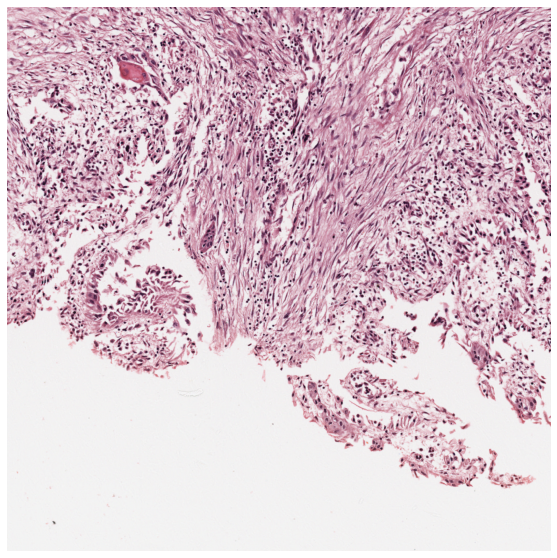

In [74]:
img_f = fnames[89]
img = open_image(img_f)
img.show(figsize=(10,10))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}-labels{x.suffix}'

In [13]:
lbl_names[1]

PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks/D-001-18_(4.04,16152,8076,4038,4038)-labels.png')

In [19]:
img_f

PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/D-001-18_(4.04,16152,8076,4038,4038).png')

In [20]:
get_y_fn(img_f)

PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks/D-001-18_(4.04,16152,8076,4038,4038)-labels.png')

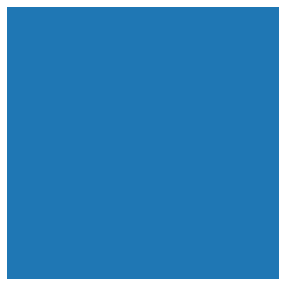

In [77]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [78]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([1000, 1000]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [79]:
codes = np.loadtxt(Path('/content/drive/My Drive/Keratin Pearl/Tiling/codes.txt'), dtype=str); codes

array(['Background', 'Keratin_Pearl'], dtype='<U13')

## Creating ImageDataBunch

In [80]:
size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=2
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=1, have 4953MB of GPU RAM free


In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.15)
       .label_from_func(get_y_fn, classes=codes))

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

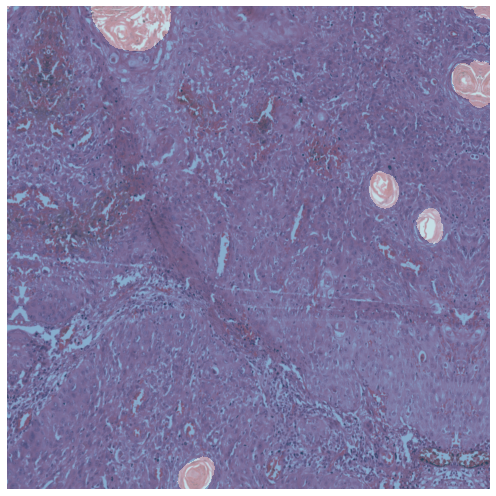

In [90]:
data.show_batch(1, figsize=(10,7))

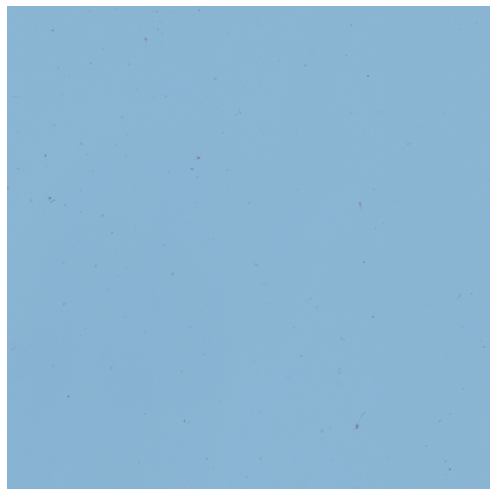

In [84]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [85]:
name2id = {v:k for k,v in enumerate(codes)}
print(name2id)
void_code = name2id['Background']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

{'Background': 0, 'Keratin_Pearl': 1}


In [0]:
metrics=acc_camvid
# metrics=accuracy

## Creating Unet Learner Object

In [0]:
wd=1e-2 #weight decay

In [0]:
learn = unet_learner(data, models.resnet34, metrics=[dice,fbeta], wd=wd)

epoch,train_loss,valid_loss,dice,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


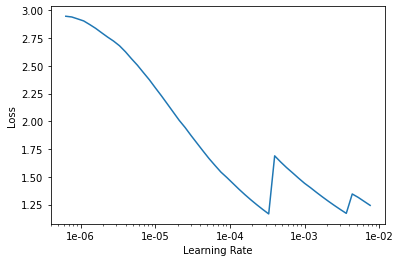

In [93]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-4

In [0]:
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice,fbeta,time


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

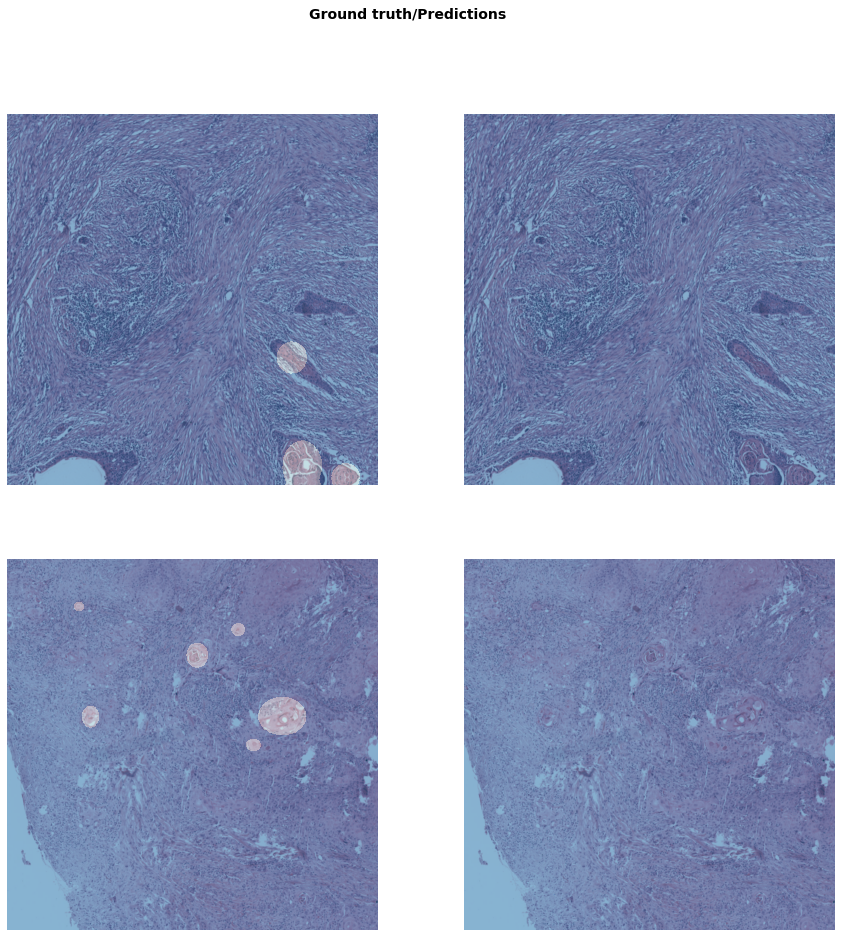

In [53]:
learn.show_results(ds_type=DatasetType.Train, rows=2, figsize=(15,15))

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4) # learning rate slicing

In [56]:
learn.fit_one_cycle(35, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,dice,fbeta,time
0,0.026680,0.017447,0.745141,0.008165,02:41
1,0.025436,0.016794,0.725634,0.008461,02:37
2,0.018499,0.017514,0.725826,0.008078,02:37
3,0.020557,0.016706,0.706781,0.008258,02:37
4,0.022167,0.016780,0.649835,0.008367,02:37
5,0.019803,0.016332,0.710398,0.008204,02:37
6,0.021409,0.014908,0.696575,0.008541,02:38
7,0.018436,0.016261,0.730529,0.008172,02:37
8,0.020014,0.014492,0.679242,0.008881,02:36


KeyboardInterrupt: ignored

In [0]:
learn.save('stage-2');

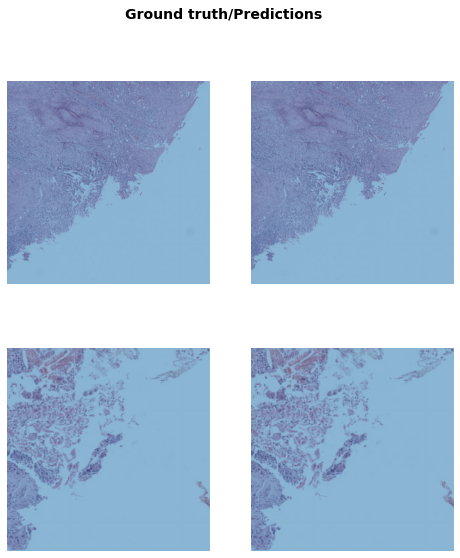

In [58]:
learn.load('stage-2')
learn.show_results(rows=5, figsize=(8,9))

## Predictions on Validation Set

In [49]:
names_valid = data.valid_ds.items
names_valid

array([PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/01-2461G_(4.04,16152,32304,4038,3540).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/29-17-IIDC_(4.04,24228,28266,4038,4038).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/29-17-IIDC_(4.04,16152,0,4038,4038).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/D-001-18_(4.04,0,4038,4038,4038).png'),
       ...,
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/29-17-IIDC_(4.04,28266,16152,2333,4038).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/S-19-126H_(4.04,0,32304,4038,176).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/29-17-IIDC_(4.04,24228,4038,4038,4038).png'),
       PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/exported_tiles/01-2461G_(4.04,0,16152,4038,4038).png')],
      dtype=o

In [0]:

for i in range(0, len(names_valid)):
    p = learn.predict(data.valid_ds.x[i])
    p[0].save('/content/drive/My Drive/Keratin Pearl/Tiling/predictions_keratin_pearl/' + names_valid[i].stem + '.png')

## Saving Final Model

In [0]:
learn.export()

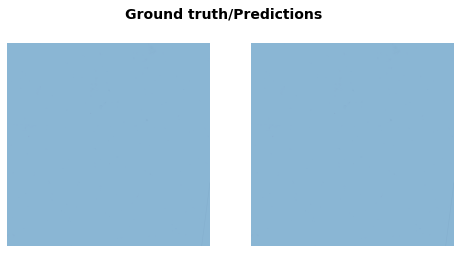

In [134]:
learn.show_results(ds_type=DatasetType.Train)

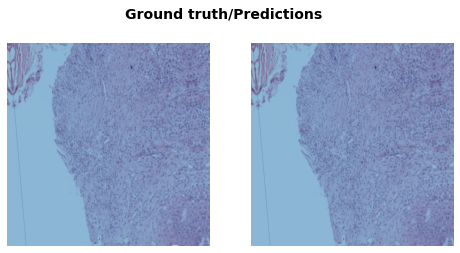

In [135]:
learn.show_results(ds_type=DatasetType.Train)

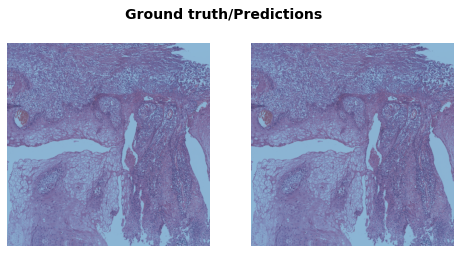

In [136]:
learn.show_results(ds_type=DatasetType.Train)

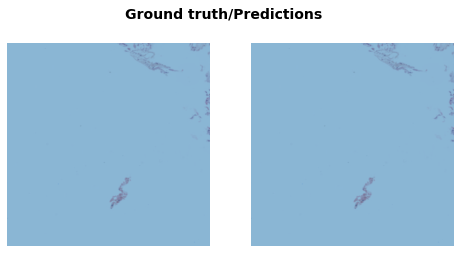

In [137]:
learn.show_results(ds_type=DatasetType.Train)

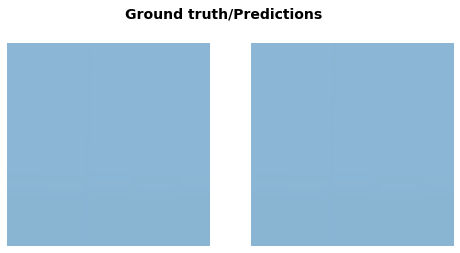

In [138]:
learn.show_results(ds_type=DatasetType.Train)

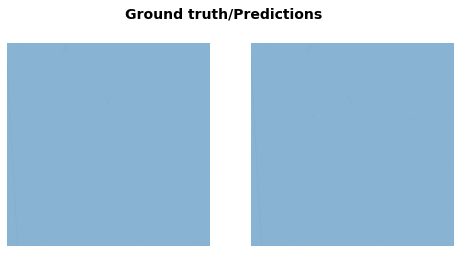

In [139]:
learn.show_results(ds_type=DatasetType.Train)

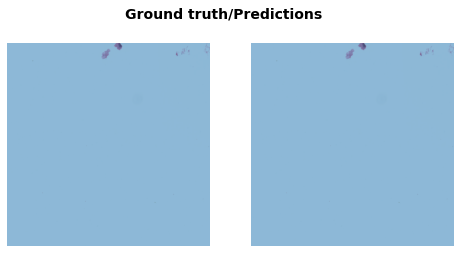

In [140]:
learn.show_results(ds_type=DatasetType.Train)

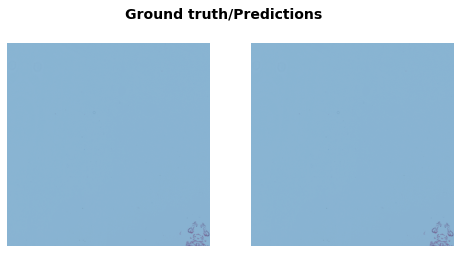

In [141]:
learn.show_results(ds_type=DatasetType.Train)

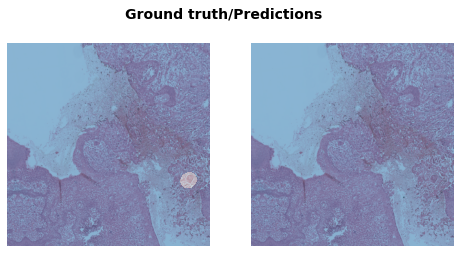

In [142]:
learn.show_results(ds_type=DatasetType.Train)

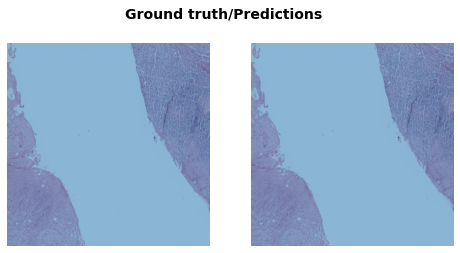

In [143]:
learn.show_results(ds_type=DatasetType.Train)

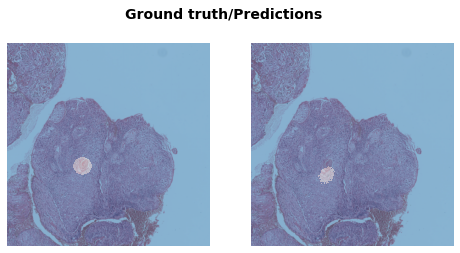

In [144]:
learn.show_results(ds_type=DatasetType.Train)

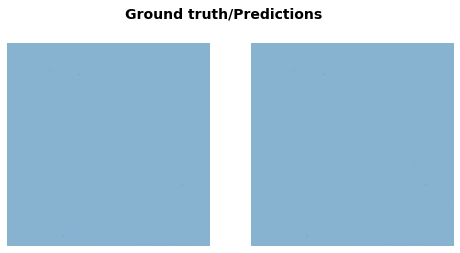

In [145]:
learn.show_results(ds_type=DatasetType.Train)

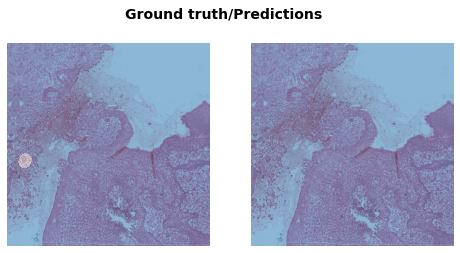

In [146]:
learn.show_results(ds_type=DatasetType.Train)

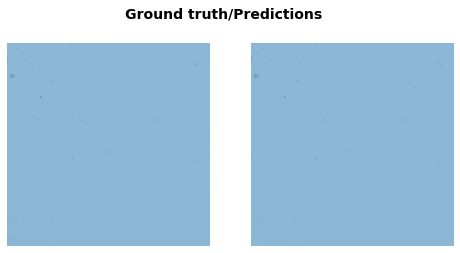

In [147]:
learn.show_results(ds_type=DatasetType.Train)

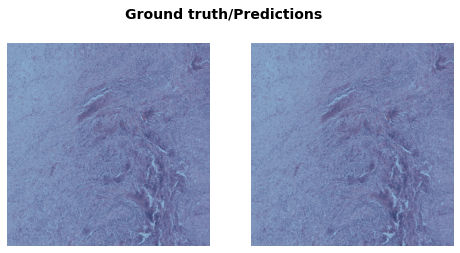

In [148]:
learn.show_results(ds_type=DatasetType.Train)

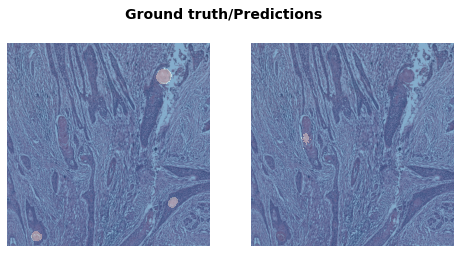

In [149]:
learn.show_results(ds_type=DatasetType.Train)

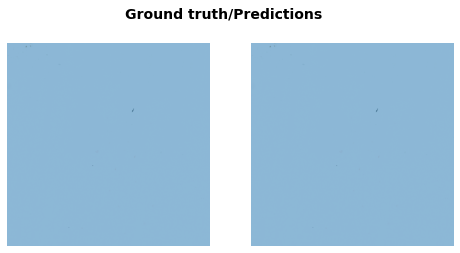

In [150]:
learn.show_results(ds_type=DatasetType.Train)

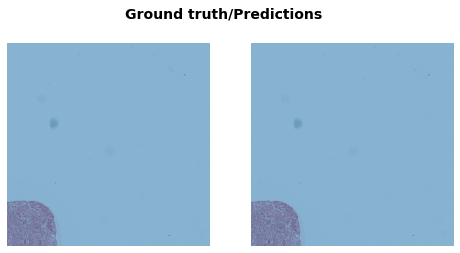

In [151]:
learn.show_results(ds_type=DatasetType.Train)

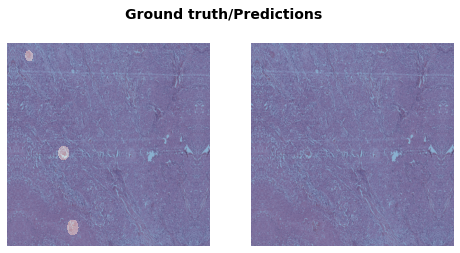

In [152]:
learn.show_results(ds_type=DatasetType.Train)

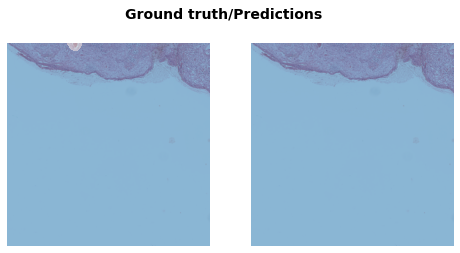

In [153]:
learn.show_results(ds_type=DatasetType.Train)

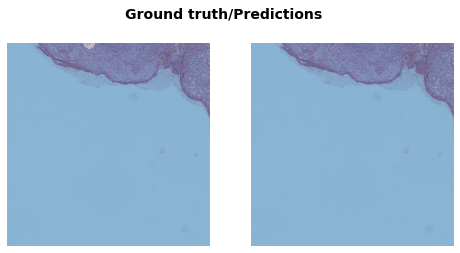

In [154]:
learn.show_results(ds_type=DatasetType.Train)

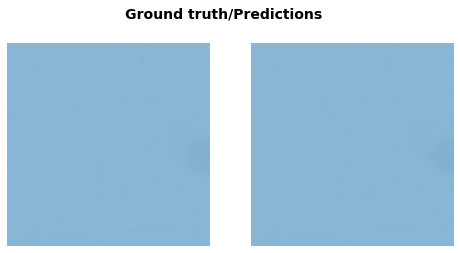

In [155]:
learn.show_results(ds_type=DatasetType.Train)